# Data Distribution in Machine Learning

> Understanding data distribution is essential for choosing appropriate preprocessing, models, and evaluation strategies.

## Why it matters?
- Algorithms like Linear Regression assume normally distributed residuals.
- Skewed data affects model accuracy and interpretability.
- Proper handling helps with scaling, transformation, outlier detection, and performance tuning.


##   Core Concepts
**Data Distribution** : It refers to how feature values are spread or clustered in the dataset. Helps determine skewness, outliers, central tendency, spread, etc. Few types of distribution are:
- **Normal(Gaussian) Distribution**: Symmetrical bell curve (mean ≈ median).
- **Skewed(Left/Right) Distribution**: Long tails on one side, affecting model assumptions.
- **Uniform Distribution**: Equal frequency across values.
- **Multimodal**: Multiple peaks, may indicate data from different sources.



In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load sample data
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


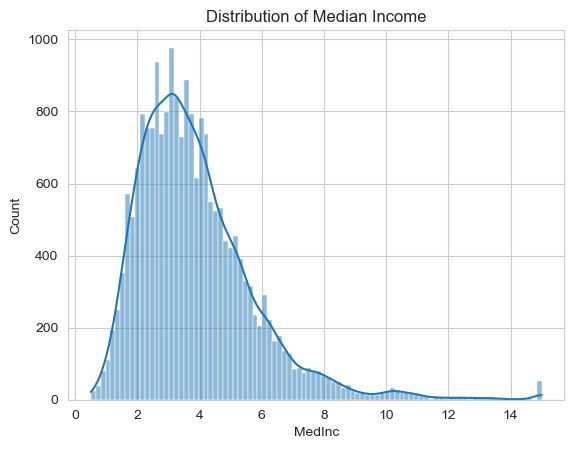

In [8]:
# Plot distribution of Median Income
sns.histplot(df['MedInc'], kde=True)
plt.title("Distribution of Median Income")
plt.show()

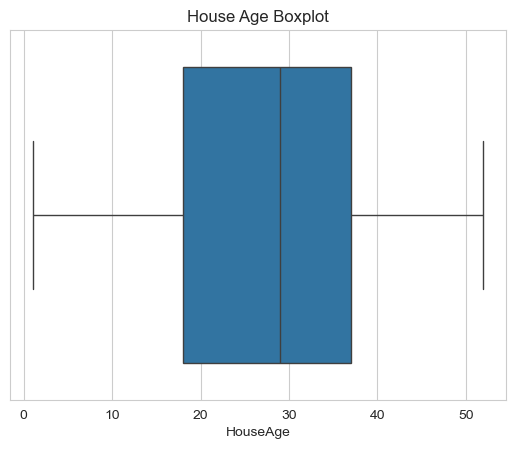

In [9]:
# Boxplot of House Age to see skewness and outliers
sns.boxplot(x=df['HouseAge'])
plt.title("House Age Boxplot")
plt.show()

##  Interview Questions & Answers
**Q1. Why is normal distribution important in ML?**
- Many models (e.g., Linear Regression) assume normal distribution of errors.

**Q2. How to test if a feature is normally distributed?**
- We can use visual tools like histplot, qqplot.

**Q3. What is skewness?**
- Measure of asymmetry: right skew -> long tail on right.

**Q4. How do you detect if a variable is skewed?**
- Use `df.skew()`, histograms, or boxplots.

**Q5. How do you handle skewed features?**
- Apply log transform, Box-Cox transform, or use tree-based models because these are insensitive to distribution.

**Q6. How do multimodal distributions affect models?**
- Clustering may fail unless modes are separated. Consider adding domain features or clustering pre-processing

**Q7. Why is it important to analyze value counts in categorical features?**
- To detect imbalance, rare classes, or high cardinality

**Q8. How would you explain why linear regression fails when features are heavily skewed?**
- Because it assumes linearity and normally distributed residuals. Therefore skewed input leads to skewed errors which leads to unreliable coefficients


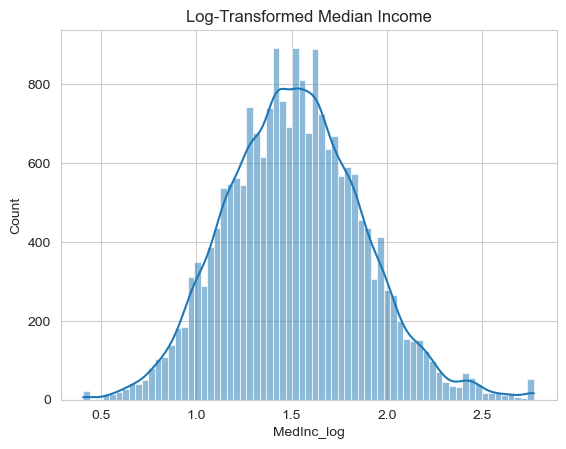

In [10]:
# Apply log1p to fix skewness
import numpy as np
df['MedInc_log'] = np.log1p(df['MedInc'])
sns.histplot(df['MedInc_log'], kde=True)
plt.title("Log-Transformed Median Income")
plt.show()

In [11]:
# Distribution of a categorical feature (ocean proximity)
sns.countplot(x='ocean_proximity', data=df)

## Best Practices Summary
| Task | Best Tool/Approach |
|------|--------------------|
| Visualize distribution | `histplot`, `boxplot`, `violinplot` |
| Handle skewness | `log1p()`, `PowerTransformer()` |
| Class imbalance | `SMOTE`, `class_weight`, `ROC-AUC` |
| Multimodal data | Consider clustering or domain-based splitting |
